# Random Numbers and Random Graphs
<div style="margin-left: 20px; font-size: 90%; color: #888888">
by Nathan Albin &lt;albin@math.ksu.edu&gt;<br>
created 2/16/2017, updated 2/16/2017
</div>

## Why random graphs?
Often when studying the structure of a particular network, for example the Internet or the connections between a group of friends on Facebook, we're not as much interested in the exact structure of this one particular network as we are in structural trends in "similar" networks.  But where does one find a bunch of networks similar to the Internet to study?  That's a huge and interesting question!  What experts in network science frequently try to do is to create a *network model*: a way of generating random networks that (hopefully) share many of the important characteristics of the given network.  Thus, rather than attempting to study the structure of the Internet (as it exists right now), we might try to study structural patterns of a hypothetical class of "alternate-Universe Internets", of which our current Internet is a particular instance.

I won't try to describe the incredible effort required to define a random network model that "acts like" the Internet or any other network.  That's still an open question, with plenty of ongoing debates.  Instead, the purpose of this notebook is to discuss, from a mathematical and algorithmic point of view, what randomness even means on a deterministic computer, the tools we have available for generating random networks, and how we can use random sampling to collect statistics from random network models.  The first big question is, how do you make a computer (which is entirely deterministic) create anything random at all?

## Random vs. pseudo-random

The short answer is, you don't.  A deterministic machine can't behave randomly.  By definition.  So, there are really only two options.

1. Find a way to introduce *true* randomness.  For cryptographic applications, this is essential.  If you need randomness to encrypt a message, then anything deterministic is bad.  There are a lot of interesting ways of trying to capture *entropy* from outside the computer in order to remove determinism: counting milliseconds between user keystrokes, timing the duration of hard-drive reads, sampling the signal from a microphone input port with no microphone attached.  It is a nontrivial task to try to bring true randomness into the realm of the computer.  Thankfully, that's not really what we need in this case.
1. Find a way to *fake* randomness.  This is the idea behind the *pseudo-random* number generator.  (Pseudo, borrowed from the Greek, meaning "false".)  In most applications other than computer security, true randomness isn't really what we need.  We just need something that sort of [looks random](http://dilbert.com/strip/2001-10-25) to the casual observer.

## A simple pseudo-random number generator (PRNG)

[PRNGs](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) are essentially deterministic sequences of numbers that give the impression of randomness.  There are a lot of subtleties in defining a good PRNG, but, simply speaking, a human being who does not know the algorithm should have a hard time figuring out what number will come up next.  Every PRNG begins from a *seed state*.  The sequence of numbers produced by the PRNG are completely determined by its seed state.  In order to change the sequence of number produced by the PRNG, you need to change the seed state.  Choosing the seed state yourself can be beneficial for some applications.  A good PRNG will be able to produce a relatively unpredictable sequence of numbers, but the sequence is easily reproduced as long as you know the seed.  That will turn out to be convenient for testing your code.  On the other hand, if you want to make your code run differently each time it's executed, you can base the seed on something with a degree of unpredictability, such as the computer's system time.  (This is a reasonable thing to do for many applications, but is *not* a good idea if you're working with ciphers.)

One example of a simple PRNG (too simple for modern applications) is the [Lehmer random number generator](https://en.wikipedia.org/wiki/Lehmer_random_number_generator).  Here is a very simple implementation of this PRNG.  Notice how the PRNG is definitely deterministic, but it's pretty hard for the human brain to predict what happens next.

In [8]:
class LehmerPRNG:
    '''Implements the Lehmer pseudo-random number generator.'''
    
    def __init__(self,seed,n=2**31-1,g=7**5):
        '''Initializes the PRNG with the given seed and optional arguments n and g.'''
        
        # copy arguments to object
        self.seed = seed
        self.n = n
        self.g = g
        
    def rand(self):
        '''Returns a pseudo-random integer.'''
        
        # update the seed
        self.seed = self.g*self.seed % self.n
        return self.seed

In [9]:
prng = LehmerPRNG(3)
for i in xrange(2):
    print prng.rand()

50421
847425747


In [7]:
prng = LehmerPRNG(3)
for i in xrange(20):
    print prng.rand()

50421
847425747
572982925
807347327
1284843143
1410633816
303082632
78585340
81366475
1726745833
323209673
1198830848
1058486182
222729126
344423961
1265083862
28879687
49595187
322652873
430627836


In [4]:
prng = LehmerPRNG(31)
for i in xrange(20):
    print prng.rand()

521017
166798131
910028382
468482340
1107638478
1691647550
984370217
96220631
124959026
2094826863
1908177523
218844763
1631928077
154050655
1411563950
903459241
1730079197
512483599
1902423923
154853678


## Two standard random number libraries

Modern PRNGs are significantly more sophisticated that the one above, but they have the same basic structure.  Probably the two most widely-used random number generation libraries in Python are [```random```](https://docs.python.org/2/library/random.html) (part of the [Python Standard Library](https://docs.python.org/2/library/index.html)) and [```numpy.random```](https://docs.scipy.org/doc/numpy/reference/routines.random.html) (a submodule of [NumPy](https://docs.python.org/2/library/index.html)).  It's worth spending some time browsing the documentation for both in order to get a sense of the functions each make available.

For our current purposes, we'll want to at least know two things.
1. How to seed each PRNG. *Seeding* a PRNG simply means initializing its seed state to a particular value.  Often, if you do not choose a seed explicitly, the PRNG will be seeded with something semi-random, like the system time.
1. How to generate random real numbers in the interval $[0,1]$ with the [uniform distribution](https://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29).  A random variable $X$ is said to be uniformly distributed on $[0,1]$ (sometimes written $X\sim U(0,1)$) if, for all $0\le a< b\le 1$, the probability that $X\in[a,b]$ is $b-a$:
$$
\mathbb{P}[X\in[a,b]] = b-a.
$$

The following code shows how to generate a bunch of random samples of such an $X$ and plot a histogram of the sample values.  If the PRNG is good and if we have enough samples, the histogram should be pretty much flat across the interval $[0,1]$.

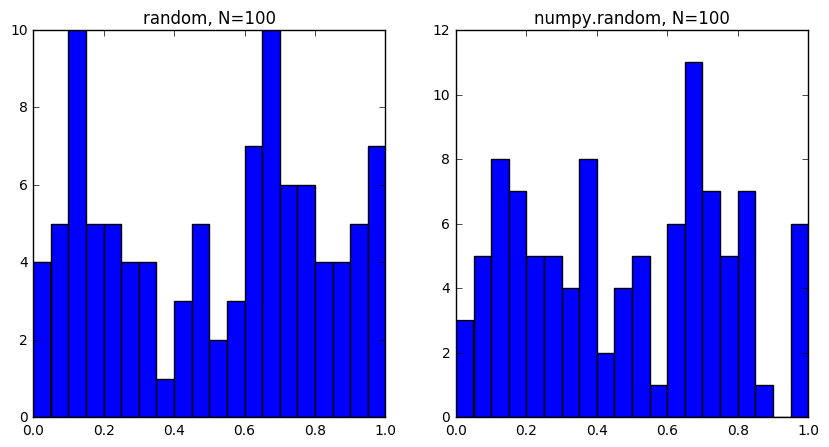

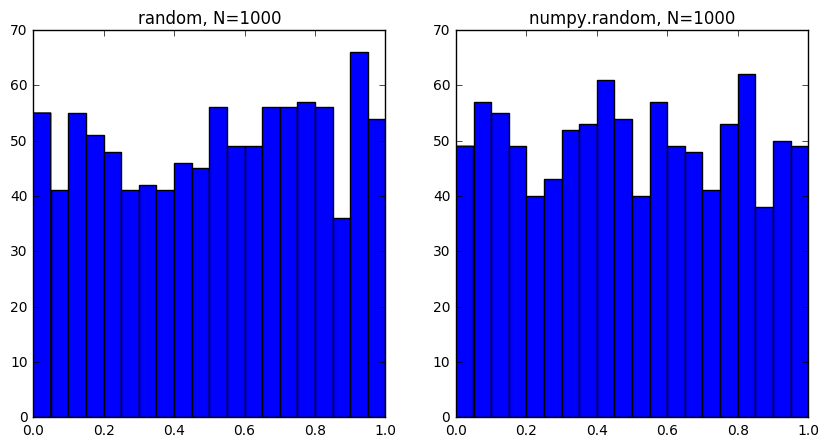

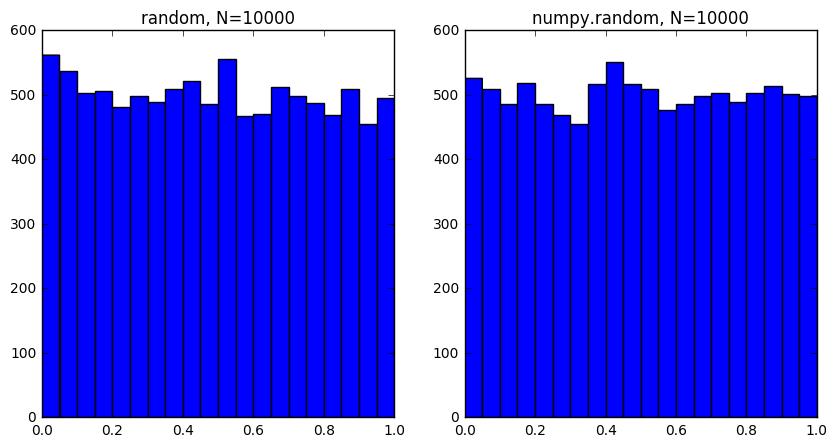

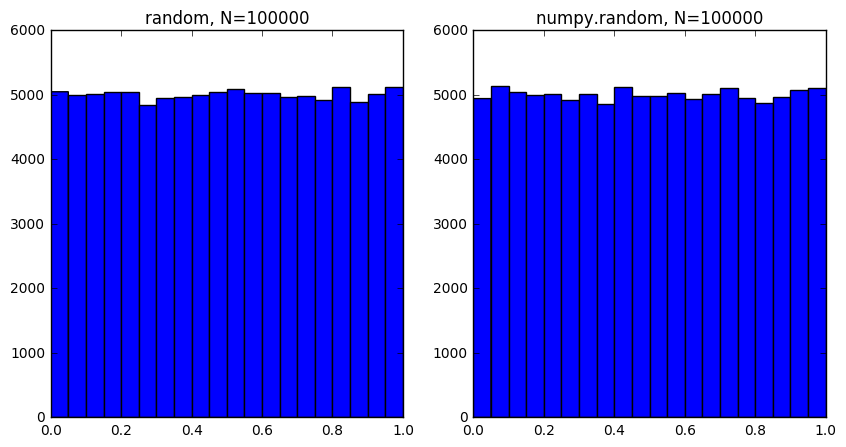

In [10]:
# random seed (try changing this value and see what happens)
seed = 4889182

# sample sizes to generate
Ns = (100, 1000, 10000, 100000)

# set up plotting
%matplotlib inline
import matplotlib.pyplot as plt

# set up the PRNGs
import random as rnd
import numpy.random as nrnd
rnd.seed(seed)
nrnd.seed(seed)

# loop over sample sizes
for N in Ns:

    # generate a bunch of random samples with each PRNG
    rsamples = [rnd.random() for i in xrange(N)]
    nsamples = nrnd.random(N)
    
    # plot histograms
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(rsamples,bins=20,range=(0,1))
    plt.title('random, N={}'.format(N))
    plt.subplot(1,2,2)
    plt.hist(nsamples,bins=20,range=(0,1))
    plt.title('numpy.random, N={}'.format(N))

## Flipping coins

With a working PRNG that can generate uniform values on $[0,1]$, it's now possible to simulate a coin flip.  The probability of "heads" when flipping a fair coin is 1/2, and that's exactly the same as the probability that our uniform random $X$ is less than 1/2.  Here's an example of how to use this fact.

In [10]:
n_coin_flips = 10
coin_flips = [ rnd.random() < 0.5 for i in xrange(n_coin_flips) ]
print coin_flips

[True, False, False, False, True, False, False, True, True, True]


In the output, we can think of ```True``` as "heads" and ```False``` as "tails".  Suppose we want to count the number of heads.  One option is to first convert the Boolean True/False into an integer.  The reason this works is that ```True```, when converted to an integer in Python, becomes the number 1, while ```False``` becomes 0.  Then we can simply sum the entries in the resulting list to count the number of heads.  Try running the code below several times.  Since we are not re-seeding the PRNG, the results should appear random.  You should expect to see "heads" roughly half the time.

In [11]:
n_coin_flips = 10
coin_flips = [ int( rnd.random() < 0.5 ) for i in xrange(n_coin_flips) ]
print coin_flips
print 'Total flips: {}'.format(n_coin_flips)
print 'Total heads: {}'.format(sum(coin_flips))

[1, 0, 0, 0, 0, 1, 1, 0, 1, 0]
Total flips: 10
Total heads: 4


The code above provides an example of sampling the [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution).  In order to sample a binomially distributed random variable $X\sim B(n,p)$, we consider a sequence of $n$ independent experiments (coin flips), each with a probability $p$ of success (heads).  The value of $X$ is the number of successful experiments out of the $n$ total.  For example, suppose $n=2$ and $p=1/3$.  There are 3 possible values for $X$, 0, 1 or 2.  The probability that $X=0$ is the probability that both experiments fail.  Since the experiments are independent, it follows that
$$
\mathbb{P}[X=0] = \frac{2}{3}\times\frac{2}{3} = \frac{4}{9}.
$$
For $X=1$, one of two things must happen: either the first experiment is successful and the second unsuccessful, or the first is unsuccessful and the second successful.  Thus
$$
\mathbb{P}[X=1] = \frac{1}{3}\times\frac{2}{3} + \frac{2}{3}\times\frac{1}{3} = \frac{4}{9}.
$$
Finally, for the case $X=2$, both experiments must be successful, so
$$
\mathbb{P}[X=2] = \frac{1}{3}\times\frac{1}{3} = \frac{1}{9}.
$$
As a sanity check, notice that
$$
\mathbb{P}[X=0] + \mathbb{P}[X=1] + \mathbb{P}[X=2] = 1.
$$

The following code cell shows how you could approximate this analytical result by simulation.

In [11]:
def sample():
    '''Samples the binomial distribution B(2,1/3).'''
    
    # flip two biased coins
    coin_flips = [ int( rnd.random() < 1./3 ) for i in xrange(2) ]
    
    # return the number of heads
    return sum(coin_flips)

# perform a few experiments just to see how it works
n_exp = 10
samples = [ sample() for i in xrange(n_exp) ]
print 'The result of {} experiments: '.format(n_exp), samples

# now perform a larger number of experiments in order to get good statistics
n_exp = 100000
samples = [ sample() for i in xrange(n_exp) ]

# calculate relative frequencies
print
print 'Performing {} experiments...'.format(n_exp)

# loop over possible outcomes
# (outcome will loop through the values 0, 1, 2)
for outcome in xrange(3):
    
    # count the number of times X = outcome
    freq = samples.count(outcome)
    
    # convert freq to a percent
    pct = 100*float(freq)/n_exp
    
    print '   % of time X={} : {}'.format(outcome, pct )

The result of 10 experiments:  [0, 0, 1, 1, 1, 1, 0, 0, 0, 1]

Performing 100000 experiments...
   % of time X=0 : 44.386
   % of time X=1 : 44.504
   % of time X=2 : 11.11


<div style='background-color: #eeeeff; border: 1px solid #66bbdd; padding: 0px;'>
<div style='padding: 10px; font-size: 125%; font-weight:bold; background-color: #66bbdd; color: white;'>Exercise 1</div>
<div style='padding: 10px; overflow: hidden; font-size: 110%;'>

The following function for sampling a binomial random variable is incorrect.  Your task is to fix it.  <strong>Do not use any library function other than uniform random sampling!</strong>  NumPy provides a routine for sampling binomial variables, but the point here is to practice writing some Python code.  You'll use NumPy's routine to check your own below.  Since there is a (pseudo) random component to the algorithm, your experimental distribution won't match NumPy's exactly, but it should be very close.

</div>
</div>

In [12]:
def binomial(n,p):
    #'''Samples a binomial random variable B(n,p).'''
   
    nn = [ int( rnd.random() < p ) for i in xrange(n) ]
    # The following is absolutely NOT what this function is supposed to do
    return sum(nn)

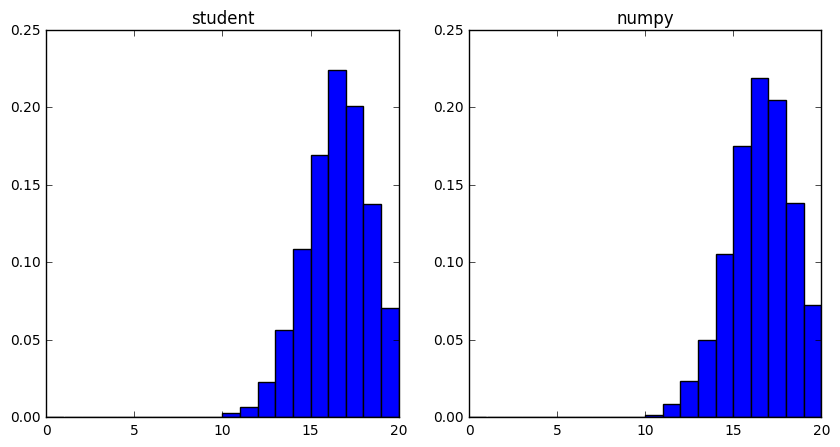

In [13]:
################################################
# compare student's binomial function to numpy's

# parameters for binomial distribution
n = 20
p = 0.8

# number of experiments
n_exp = 10000

# experiments from student
s_exp = [ binomial(n,p) for i in xrange(n_exp) ]

# experiments from numpy
n_exp = nrnd.binomial(n,p,n_exp)

# compare on a histogram
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(s_exp,bins=20,range=(0,n),normed=True)
plt.title('student')
plt.subplot(1,2,2)
plt.hist(n_exp,bins=20,range=(0,n),normed=True)
plt.title('numpy');

## Our first random graph: G(n,p)

Now we're ready to consider our first random graph model, the [Erdős–Rényi model](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model).  (Actually, there are two subtly different Erdős–Rényi models, we'll be considering the one referred to as G(n,p).)  Take a little time to read about the G(n,p) model on Wikipedia.  This is one of the most famous random graph models.  It has been widely studied, and has a lot of interesting properties.  Soon, we'll see how to create random networks using ```networkx```, but first, here's a short code that shows how to create the adjacency matrix for a G(n,p) network.

In [14]:
def gnp_adjacency(n,p):
    '''Creates the adjacency matrix of a random G(n,p) network.'''
    
    # often, in real-world code, you'll want to import modules into your functions
    # rather than expecting them to be imported into the global namespace
    import numpy as np
    import random as rnd
    
    # create the adjacency matrix for a completely edgeless graph
    A = np.zeros((n,n),dtype=int)
    
    # now loop over edges
    # notes:
    #   1) in numpy (as with Python in general) indices start at 0
    #   2) edges {i,j} are UNORDERED pairs, so we don't need to consider
    #      both {i,j} and {j,i}.  in this code, we'll only consider pairs
    #      {i,j} with i>j.
    
    # start looping i at 1
    for i in xrange(1,n):
        
        # j goes from 0 to i-1
        for j in xrange(i):
            
            # if a biased coin is heads...
            if rnd.random() < p:
                
                # connect i to j (taking care of symmetry)
                A[i,j], A[j,i] = 1, 1
                
    return A

Here it is in action. (Try running this several times with different parameters.)

In [3]:
gnp_adjacency(10,0.3)

array([[0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])

```networkx``` can create networks from adjacency matrices.

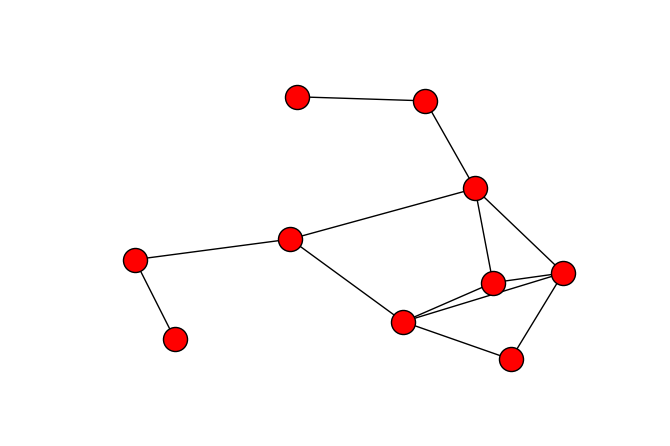

In [16]:
import networkx as nx

G = nx.from_numpy_matrix( gnp_adjacency(10,0.3) )
nx.draw(G)

But ```networkx``` also has its own (possibly more efficient) method for creating G(n,p) graphs.

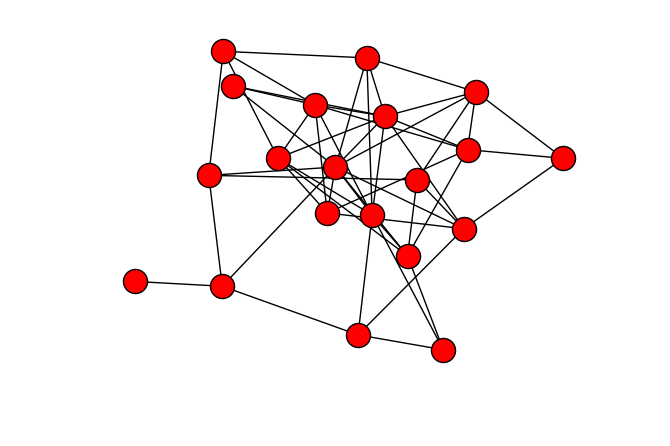

In [17]:
G = nx.gnp_random_graph(20,0.3)
nx.draw(G)

Sometimes, when you're testing your code, it's helpful to pass ```networkx``` a seed to ensure that you always create the same "random" graph.  (Note that the default layout algorithm is also randomized.  It's possible, but not quite as easy to seed the PRNG in charge of layout.)

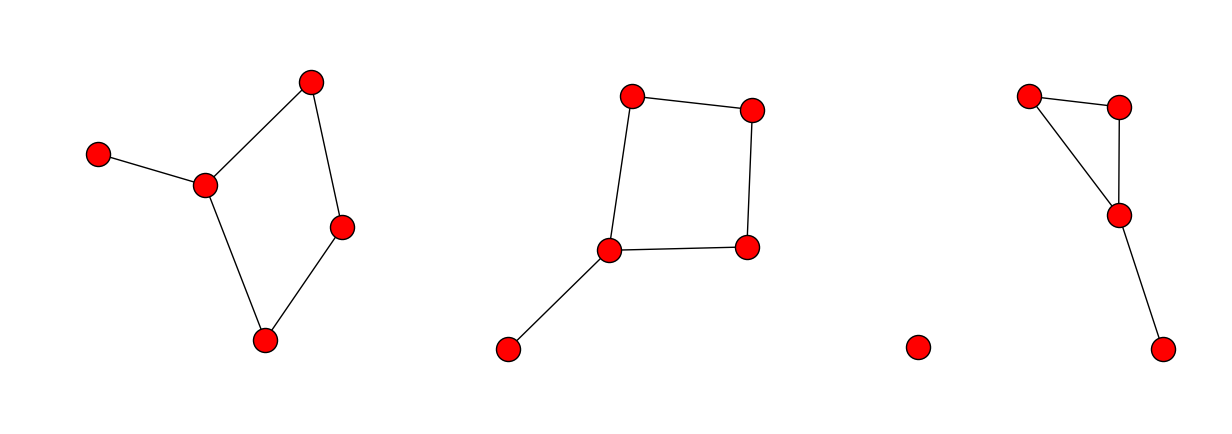

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
G = nx.gnp_random_graph(5,0.3,8281)
nx.draw(G)
plt.subplot(1,3,2)
G = nx.gnp_random_graph(5,0.3,8281)
nx.draw(G)
plt.subplot(1,3,3)
G = nx.gnp_random_graph(5,0.3)
nx.draw(G)

## Collecting statistics on random graphs

If you look back at the [Wikipedia article](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model#Properties_of_G.28n.2C_p.29), you'll see that, for large G(n,p) graphs, the *degree distribution* on the vertices is approximately Poisson:
$$
\mathbb{P}[\deg(v)=k] \approx \frac{(np)^k e^{-np}}{k!}.
$$
It's important to keep in mind that this is only for large graphs.  For small graphs, the vertex degrees are strongly correlated.  For example, in a G(2,p) graph, either both vertices have degree 0 or both have degree 1.  For large graphs, there is still some correlation, but as $n\to\infty$, the vertex degrees can be treated as essentially uncorrelated.

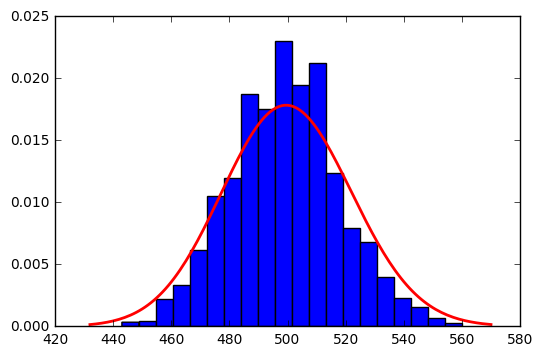

In [19]:
# import some useful libraries
from scipy.stats import poisson
import numpy as np

# parameters for the G(n,p) graph
n = 2000
p = 0.25

# create a random graph
G = nx.gnp_random_graph(n,p)

# the parameter lambda for the Poisson distribution
lam = n*p

# range of likely degree values
x = np.arange(poisson.ppf(0.001,lam),poisson.ppf(0.999,lam))

# histogram plot of actual degrees
plt.hist( G.degree().values(),bins=20,normed=True)

# plot of Poisson PMF
plt.plot( x, poisson.pmf(x,lam), 'r', linewidth=2)

## In search of the giant component

Here's another fun fact about G(n,p) graphs.  Obviously, if $p=0$, the graph will definitely be disconnected and if $p=1$ the graph will definitely be connected.  For $p$ somewhere in between 0 and 1 (depending on $n$), there is a transition between the graph being likely to be disconnected and being likely to be connected.  (You can find the precise statement of this fact in various places.)

Here, we'll experimentally look at a related question.  Suppose that we choose a positive constant $\lambda>0$ and look at G(n,p) graphs with $n\to\infty$ and with $p=p(n)=\lambda/n$.  For this choice of $p$, these graphs are very likely to be disconnected and, thus, will probably have several connected components.  The question is, will the components all be fairly small, or will there be at least one really big component?

The following (incomplete) code attempts to address this question.  For a range of $n$ and $\lambda$ values, a G(n,p(n)) graph is created and (when the code is completed) the size of the largest component is measured.  These data are then plotted on a series of scatter plots.

<div style='background-color: #eeeeff; border: 1px solid #66bbdd; padding: 0px;'>
<div style='padding: 10px; font-size: 125%; font-weight:bold; background-color: #66bbdd; color: white;'>Exercise 2</div>
<div style='padding: 10px; overflow: hidden; font-size: 110%;'>
<ol>
    <li>Fix the code.
        <ul>
            <li>You don't have to solve it exactly like I would, but you should be efficient.</li>
            <li>I was able to find the size of the largest component in a single line using the Python standard functions <tt>len</tt>, <tt>max</tt>, the NetworkX function <tt>connected_components</tt>, and Python <a href="https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions">list comprehension</a>.</li>
            <li>It would be a very good idea for you to work out your code in a separate cell on some small test graphs to make sure you get it working correctly.  This is a standard best-practice in programming: design your code in small chunks.  You'll be much better able to verify that your code is correct if you keep it separate from the rest of the code below until you have it working the way you want.</li>
        </ul>
    </li>
    <li>Explain the result.<br>
    After your code is working, take a look at the plots.  Do some digging in textbooks or on the internet and find the the mathematical result that is demonstrated in this example.  Beneath the box marked "Answer" below, write a paragraph or so describing what you find.
    </li>
</ol>
</div>
</div>

<div style='padding: 10px; font-size: 125%; font-weight:bold; background-color: #dd6666; color: white;'>Answer</div>

*Remove this line and type your answer here*

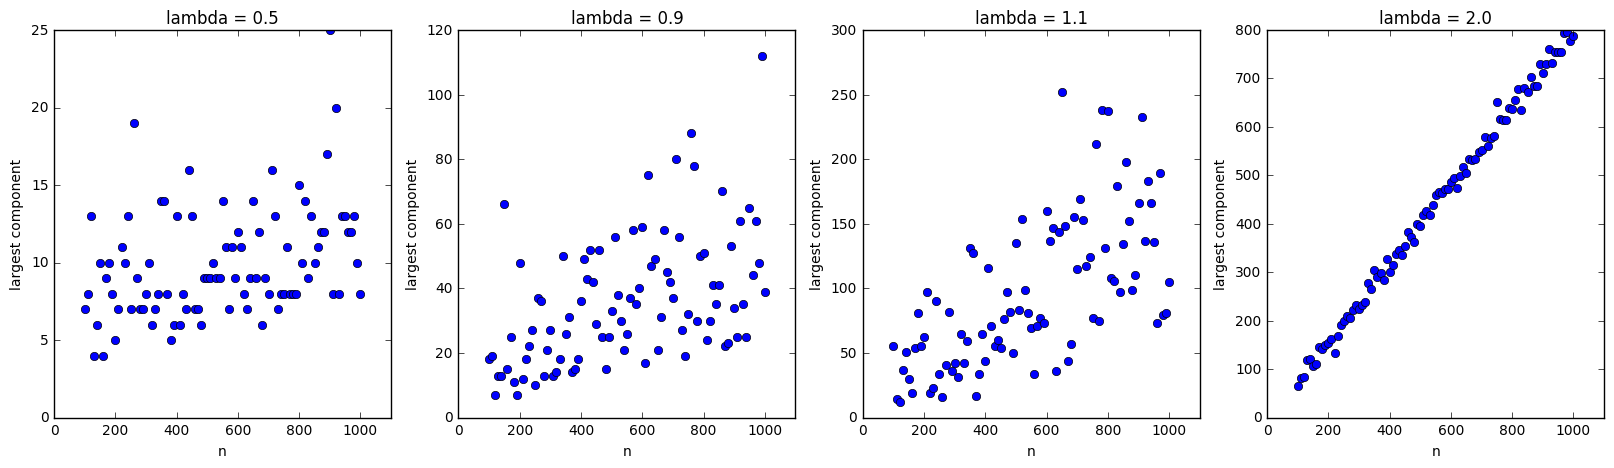

In [54]:
# list of lambda values to loop over
lams = (0.5, 0.9, 1.1, 2.0)

# list of n values to loop over
ns = range(100,1001,10)

# numpy array to store largest component size
data = np.zeros(len(ns))

# set up figure
n_lams = len(lams)
plt.figure(figsize=(5*n_lams,5))

# loop over lambda
for lam_ind,lam in enumerate(lams):

    # loop over n values
    for n_ind,n in enumerate(ns):

        # compute p
        p = lam/n

        # create a G(n,p) graph
        G = nx.gnp_random_graph(n,p)

        # find the size of the largest connected component
        k= max(nx.connected_components(G), key= len);
        
        
       
        data[n_ind] = len(k);
        

    # plot the data
    plt.subplot(1,n_lams,lam_ind+1)
    plt.plot(ns,data,'o')
    plt.xlabel('n')
    plt.ylabel('largest component')
    plt.xlim([min(ns)-100,max(ns)+100])
    plt.title('lambda = {}'.format(lam) )

In [52]:
7**5
    

16807